In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage import io

In [2]:
image_path = "/Users/felipepesantez/Pictures/inference/minecraft.jpg"
image = io.imread(image_path)

In [3]:
width, height, depth = image.shape
pixels = np.reshape(image, (width * height, depth))
pixels_sample = shuffle(pixels, random_state=0)[:1000]
n_colors = 5

In [4]:
kmeans = KMeans(n_clusters=n_colors, random_state=0)
kmeans.fit(pixels_sample)

centers = kmeans.cluster_centers_
labels = kmeans.predict(pixels)

segmented_image = np.reshape(centers[labels], (width, height, depth))

/Users/felipepesantez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


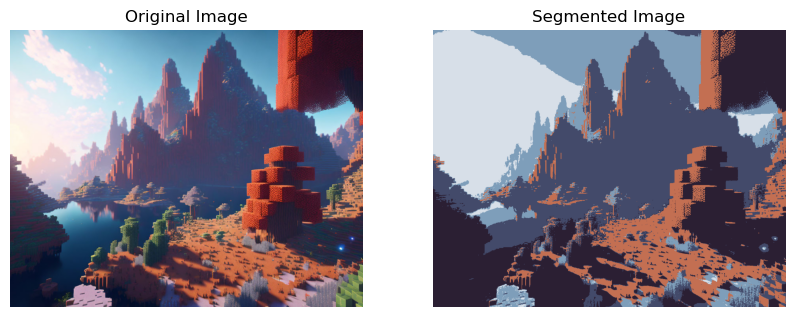

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')
plt.axis('off')

plt.show()